# Insurance Premium Prediction

### STEP-1 Load data from csv.
[Link to dataset](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset).

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### STEP-2 EDA

In [5]:
# Checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- No null values ot be found

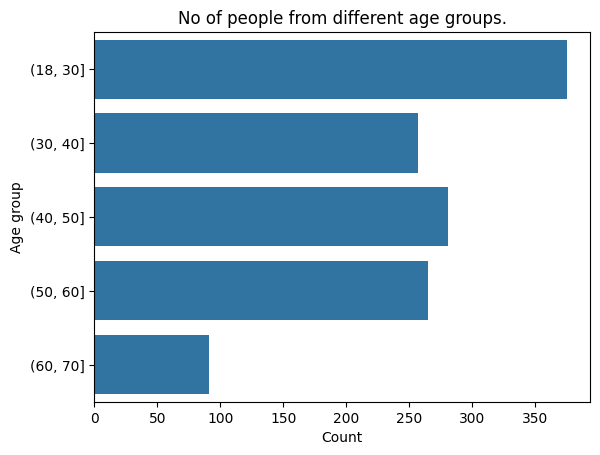

In [6]:
sns.countplot(data=pd.cut(df["age"], [18, 30, 40, 50, 60, 70]))
plt.title("No of people from different age groups.")
plt.xlabel("Count")
plt.ylabel("Age group")
plt.show()

- People from age 18 to 30 are more likely to buy an insurance then other age groups.

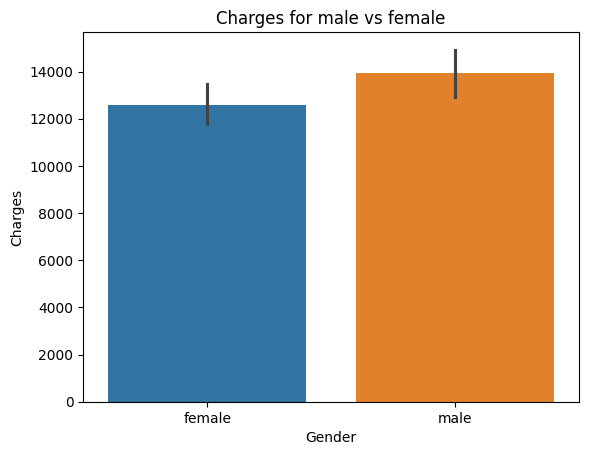

In [7]:
sns.barplot(data=df, x="sex", y="charges", hue="sex")
plt.title("Charges for male vs female")
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

- It looks like male have to pay more premium then female, which is not fair.

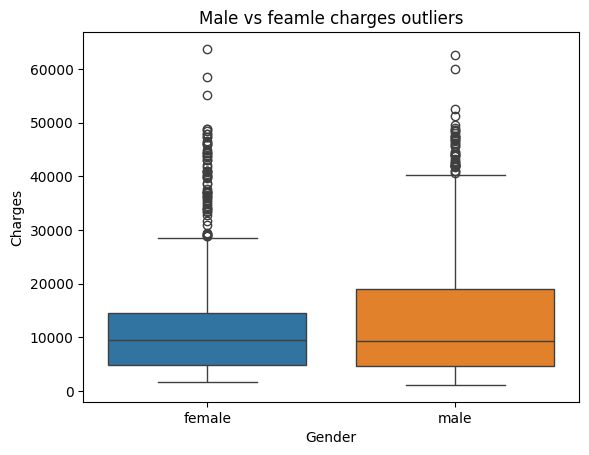

In [19]:
sns.boxplot(data=df, x="sex", y="charges", hue="sex")
plt.title("Male vs feamle charges outliers")
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

- Dispite males are paying more charges then female but it looks there are more outliers in female as compared to male.
- These outliers can be due to some previous medical issues which are more offten to found in female, for which they have to pay extra charges.
- 50% of the male and feamle are paying the same amount of charges that is 10000.

In [9]:
df["age-bin"] = pd.cut(df["age"], [18, 30, 40, 50, 60, 70])

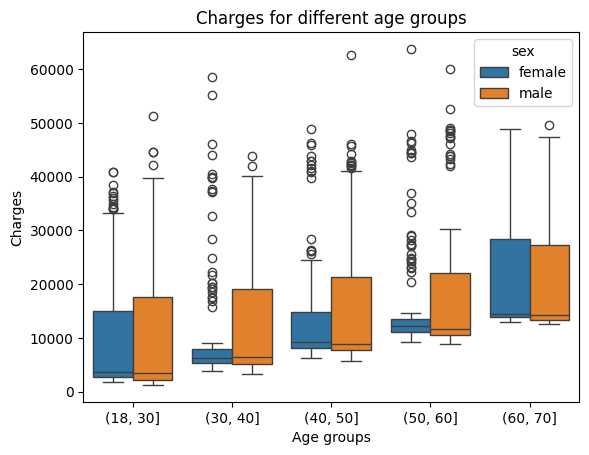

In [17]:
sns.boxplot(data=df, x="age-bin", y="charges", hue="sex")
plt.title("Charges for different age groups")
plt.xlabel("Age groups")
plt.ylabel("Charges")
plt.show()

- There are lot of outliers in all the age groups except 60-70.
- Most of the outliers are from female groups.
- So taking decision for premium of female so risky as outliers are also part of the data.
- In 50% of the cases the charges are same for both male and female.

In [11]:
df["bmi-bin"] = pd.cut(df["bmi"], [10, 20, 30, 40, 50, 60])

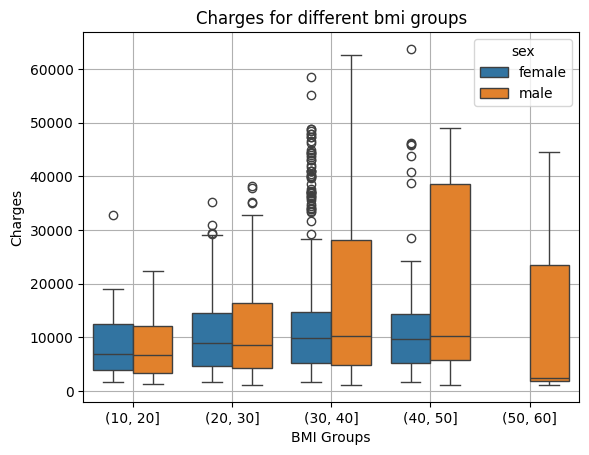

In [20]:
sns.boxplot(data=df, x="bmi-bin", y="charges", hue="sex")
plt.title("Charges for different bmi groups")
plt.xlabel("BMI Groups")
plt.ylabel("Charges")
plt.grid()
plt.show()

- As we can see there are a lot of outliers in the bmi group of 30-40 for female.
- So taking decision for charges can be risky for this group of of females.
- Chargers for bmi more then 30 increases rapidly for male then for female.
- In 50% of the cases the charges are same for both male and female.

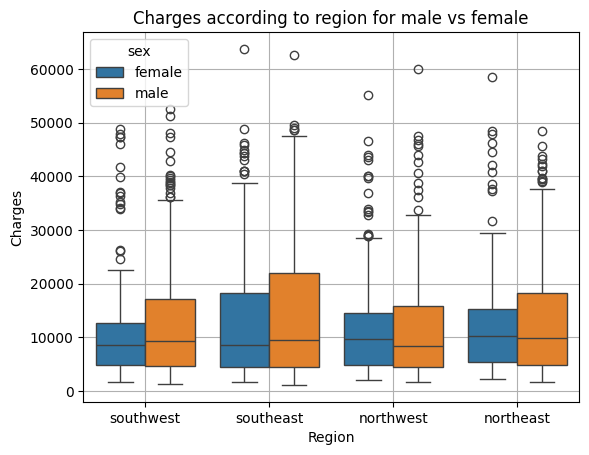

In [23]:
sns.boxplot(data=df, x='region', y='charges', hue='sex')
plt.title("Charges according to region for male vs female")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.grid()
plt.show()

- According to above graph outlier can be found in all the regions.
- 50% of male and female from southeast region are paying more more charges then other regions.

### Conclusion
- People from age group 18-30 are more likly to buy insurance.
- Male are charged with higher premium then female for all the age groups.
- But there are more outliers in female then male for all the groups except 60-70 age group.
- So taking premium decision is more risky.
- In 50% of the cases the charges are for both male and female are same.
- 50% of the people from southeast region are paying more charges then othe regions.